In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axis as axis
import matplotlib.ticker as ticker
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import math
plt.style.use('seaborn-white')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [9]:
# Import data from country_wise_latest.csv and name it as df_country

df_country = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")

# print out the first 5 obs
df_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
#print number of countries, number of variables

print('Number of countries:{}, Number of variables:{}'.format(df_country.shape[0],df_country.shape[1]))

Number of countries:187, Number of variables:15


In [ ]:
# list the WHO regions

pd.DataFrame(np.unique(df_country['WHO Region']),columns = ["WHO Region"])

In [44]:
# Sort the df_country by column 'Confirmed' in descending order,
# then get the top 10 observations and save them in the new var 'df_country_sortconfirmed'

df_country_sortconfirmed =df_country.sort_values('Confirmed',ascending= False).head(10).sort_values(['WHO Region','Confirmed'],ascending= True)

# select and print columns 'Country/Region','Deaths','WHO Region' of df_country_sortconfirmed
df_country_sortconfirmed[['Country/Region','Confirmed','WHO Region']]

,Country/Region,Confirmed,WHO Region
154,South Africa,452529,Africa
35,Chile,347923,Americas
132,Peru,389717,Americas
111,Mexico,395489,Americas
23,Brazil,2442375,Americas
173,US,4290259,Americas
81,Iran,293606,Eastern Mediterranean
177,United Kingdom,301708,Europe
138,Russia,816680,Europe
79,India,1480073,South-East Asia


In [42]:
# prepare parameters for plots

scatter_x = np.array(df_country_sortconfirmed['Country/Region'])

scatter_y = np.array(df_country_sortconfirmed['Confirmed'])

size = np.array(df_country_sortconfirmed['Confirmed']/500)

colors = {'Eastern Mediterranean': 'r', 'Europe': 'b', 'Africa': 'g','Americas': 'y','Western Pacific': 'c','South-East Asia': 'm'}

group = np.array(['Africa','Americas','Americas','Americas','Americas','Americas','Eastern Mediterranean','Europe','Europe','South-East Asia'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


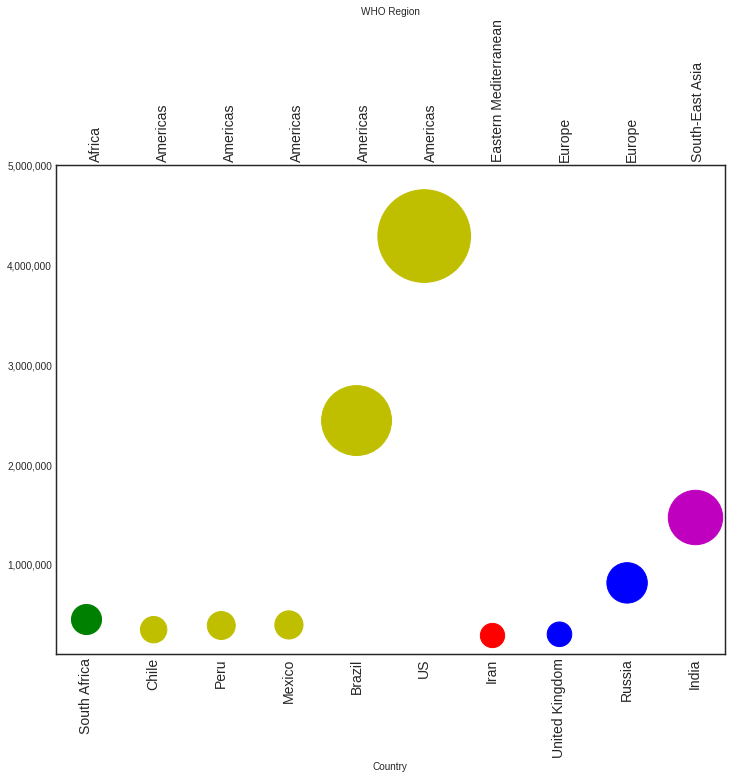

In [43]:
#Plots

f,ax= plt.subplots(1,1,figsize=(12, 9))
ax2 = ax.twiny()
plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=14, rotation=90)

plt.ylim([100000,5000000])
plt.yticks(fontsize=14, color = 'black')


## add first x-axis
ax.set_xticklabels(list(df_country_sortconfirmed['Country/Region']),fontsize=14, rotation=90)
ax.set_xlabel(r"Country")
## add second x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.arange(0.06,1.06,0.1))
ax2.set_xticklabels(['Africa','Americas','Americas','Americas','Americas','Americas','Eastern Mediterranean','Europe','Europe','South-East Asia'])
ax2.set_xlabel(r"WHO Region")

for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i],scatter_y[i],
            c = colors[g], s = size[i], lw=1, label = g)


plt.show()

In [45]:
# Sort the df_country by column 'Deaths' in descending order,
# then get the top 10 observations and save them in the new var 'df_country_sortdeath'

df_country_sortdeath = df_country.sort_values('Deaths',ascending= False).head(10).sort_values(['WHO Region','Deaths'],ascending = True)

df_country_sortdeath[['Country/Region','Deaths','WHO Region']]


# select and print columns 'Country/Region','Deaths','WHO Region' of df_country_sortdeath
df_country_sortdeath[['Country/Region','Deaths','WHO Region']]

,Country/Region,Deaths,WHO Region
132,Peru,18418,Americas
111,Mexico,44022,Americas
23,Brazil,87618,Americas
173,US,148011,Americas
81,Iran,15912,Eastern Mediterranean
157,Spain,28432,Europe
61,France,30212,Europe
85,Italy,35112,Europe
177,United Kingdom,45844,Europe
79,India,33408,South-East Asia


In [ ]:
# prepare parameters for plots

scatter_x = np.array(df_country_sortdeath['Country/Region'])

scatter_y = np.array(df_country_sortdeath['Deaths'])

size = np.array(df_country_sortdeath['Deaths']**2/3000000)

colors = {'Eastern Mediterranean': 'r', 'Europe': 'b', 'Africa': 'g','Americas': 'y','Western Pacific': 'c','South-East Asia': 'm'}

group = np.array(['Americas','Americas','Americas','Americas','Eastern Mediterranean','Europe','Europe','Europe','Europe','South-East Asia'])



In [ ]:
# Plots

f,ax= plt.subplots(1,1,figsize=(12, 9))
ax2 = ax.twiny()
plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



plt.ylim([2000,180000])
plt.yticks(fontsize=16, color = 'black')

plt.title('Total Deaths Colored by WHO Region', color='black')
plt.xticks(fontsize=14, rotation=90)


## add first x-axis
ax.set_xticklabels(list(df_country_sortdeath['Country/Region']),fontsize=14, rotation=90)
ax.set_xlabel(r"Country")
## add second x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.arange(0.06,1.06,0.1))
ax2.set_xticklabels(['Americas','Americas','Americas','Americas','Eastern Mediterranean','Europe','Europe','Europe','Europe','South-East Asia'])
ax2.set_xlabel(r"WHO Region")

for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i],scatter_y[i],
            c = colors[g], s = size[i], lw=1, label = g)



plt.show()

In [ ]:
df_country_sum = df_country.groupby('WHO Region').sum()
df_country_sum['WHO Region'] =['Africa','Americas','Eastern Mediterranean','Europe','South-East Asia','Western Pacific']

df_country_sum['Popultion (in millions)'] = [1019.922,992.155,664.336,916.315,1947.632,1889.901]

df_country_sum['Confirmed cases/ million people'] =np.round(df_country_sum['Confirmed'] /df_country_sum['Popultion (in millions)'],3)

df_country_sum['Deaths / million people'] =np.round(df_country_sum['Deaths'] /df_country_sum['Popultion (in millions)'],3)

df_country_sum[['Popultion (in millions)','Confirmed cases/ million people','Deaths / million people']]


In [ ]:
f,ax= plt.subplots(1,1,figsize=(16, 9))

plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=14, color = 'black')

plt.title('Total Confirmed Cases Grouped by WHO Region', color='black')



colors = {'Eastern Mediterranean': 'r', 'Europe': 'b', 'Africa': 'g','Americas': 'y','Western Pacific': 'c','South-East Asia': 'm'}



df_country_sum.plot(x='WHO Region',y='Confirmed',kind="bar", ax=f.gca(), color=[colors[i] for i in df_country_sum['WHO Region']])
plt.show()




In [ ]:
f,ax= plt.subplots(1,1,figsize=(16, 9))

plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=14, color = 'black')

plt.title('Confirmed Cases / 1 million people Grouped by WHO Region', color='black')



colors = {'Eastern Mediterranean': 'r', 'Europe': 'b', 'Africa': 'g','Americas': 'y','Western Pacific': 'c','South-East Asia': 'm'}

df_country_sum.plot(x='WHO Region',y='Confirmed cases/ million people',kind="bar", ax=f.gca(), color=[colors[i] for i in df_country_sum['WHO Region']])
plt.show()

In [ ]:
f,ax= plt.subplots(1,1,figsize=(16, 9))

plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=14, color = 'black')



plt.title('Total Deaths Grouped by WHO Region', color='black')
df_country_sum.plot(x='WHO Region',y='Deaths',kind="bar", ax=f.gca(), color=[colors[i] for i in df_country_sum['WHO Region']])
plt.show()

In [ ]:
f,ax= plt.subplots(1,1,figsize=(16, 9))

plt.ticklabel_format(style = 'plain')

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=14, color = 'black')

plt.title('Deaths / 1 million people Grouped by WHO Region', color='black')



colors = {'Eastern Mediterranean': 'r', 'Europe': 'b', 'Africa': 'g','Americas': 'y','Western Pacific': 'c','South-East Asia': 'm'}

df_country_sum.plot(x='WHO Region',y='Deaths / million people',kind="bar", ax=f.gca(), color=[colors[i] for i in df_country_sum['WHO Region']])
plt.show()

In [ ]:
#Plot Deaths/100 Cases and Recovered / 100 cases of each country grouped by WHO regions

fig, axs = plt.subplots(1,2,figsize=(16,  9))



df_country.boxplot(column =['Deaths / 100 Cases'],
                   by = 'WHO Region', ax=axs[0],rot = 90,fontsize = 14)

df_country.boxplot(column =['Recovered / 100 Cases'],
                   by = 'WHO Region', ax=axs[1],rot = 90,fontsize = 14)



In [ ]:
df_country.groupby('WHO Region').max()[['Country/Region','Deaths / 100 Cases']].iloc[[2],:]

In [ ]:
#Plot Deaths/100 Cases of each country grouped by WHO regions after removing the outlier (Yemen)

df_country.loc[df_country['Country/Region']!='Yemen'].boxplot(column =['Deaths / 100 Cases'],
                   by = 'WHO Region',rot = 90,fontsize = 14,figsize = (16,9))

plt.title('Deaths / 100 Cases (excluding Yemen)')

In [ ]:
column_name = list(df_country.columns)

#column_name.remove('Deaths / 100 Cases')

df_country.replace([np.inf, -np.inf], np.nan, inplace=True)

df_country.dropna(subset=['Deaths / 100 Cases'],how='any',axis=0,inplace=True)

df_country.dropna(how = 'all',axis=1,inplace=True)

ml_country_cat = df_country[['WHO Region']]

ml_dummy = pd.get_dummies(ml_country_cat,drop_first =True)
ml_num = df_country.drop(['Country/Region','WHO Region',], axis = 1)

fill_na = lambda col: col.fillna(col.mean())

ml_num = ml_num.apply(fill_na,axis = 0)

ml_df = pd.concat([ml_num,ml_dummy],axis = 1)

#ml_df.head()



Text(0.5, 1.0, 'Correlation Heatmap')

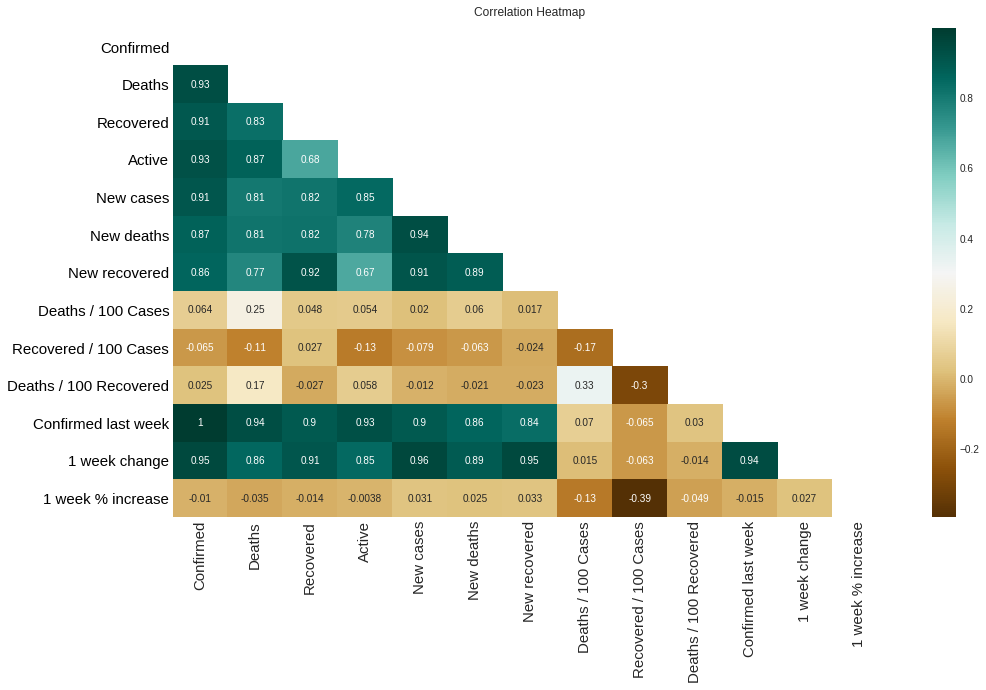

In [5]:
#Use heatmap to show correlations between each variables

df_country_num = df_country.select_dtypes(include = ['float','int'])


plt.figure(figsize=(16, 9))

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, color = 'black')

mask = np.triu(np.ones_like(df_country_num.corr(), dtype=np.bool))

corr_map= sns.heatmap(df_country_num.corr(),annot = True,cmap='BrBG',mask =mask)

corr_map.set_title("Correlation Heatmap", pad = 12)

In [29]:
# Data cleaning for training linear model


## dropping na
df_country.dropna(subset=['Deaths / 100 Cases'],how="any",axis = 0,inplace = True)

## selecting mumeric vairables
df_country_num = df_country.select_dtypes(include = ['float','int'])

## replacing infinity to nan
df_country_num = df_country_num.replace([np.inf, -np.inf], np.nan)

## imputation with col mean
fill_na = lambda col:col.fillna(col.mean())

df_country_num = df_country_num.apply(fill_na)

## creating dummy variable of WHO region, here set Africa as the reference
df_country_region = df_country['WHO Region']

df_country_dummy = pd.get_dummies(df_country_region,drop_first = True)

# Concate cleaned numeric and dummy dataframe
ml_df = pd.concat([df_country_num,df_country_dummy],axis = 1)


In [36]:
#independent variables

X = ml_df.drop('Deaths / 100 Cases',axis = 1)

#Depentent variable
y= pd.DataFrame(ml_df['Deaths / 100 Cases'])


#spliting data into training and testing
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)
# check infinity and
print("Is there any missing values in X_train ? :{} ".format(np.any(np.isnan(X_train))))

print("Is there any infinity values in X_train ? {}".format(np.all(np.isfinite(X_train))))

print("Is there any missing values in y_train ? {}".format(np.all(np.isnan(y_train))))

Is there any missing values in X_train ? :False 
Is there any infinity values in X_train ? True
Is there any missing values in y_train ? False


In [40]:
lm_model = LinearRegression(normalize = True)

lm = lm_model.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)
#print(X_train_pred.shape)

#print(X_train.shape)
r2_train = r2_score(y_train,y_train_pred)
r2_test =r2_score(y_test,y_test_pred)

print("r2_score of training dataset {}".format(r2_train))
print("r2_score of testing dataset {}".format(r2_test))


coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients.columns=['Variables',"Coefficients"]

coefficients

r2_score of training dataset 0.30934485104187615
r2_score of testing dataset 0.4580570777428695


,Variables,Coefficients
0,Confirmed,-0.000004
1,Deaths,0.000411
2,Recovered,-0.000005
3,Active,-0.000010
4,New cases,0.000400
5,New deaths,-0.007451
6,New recovered,-0.000262
7,Recovered / 100 Cases,-0.006877
8,Deaths / 100 Recovered,0.002012
9,Confirmed last week,-0.000005
